<a href="https://colab.research.google.com/github/apurv2000/Django/blob/main/pytorch_quick_start.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch 1.2 Quickstart with Google Colab
In this code tutorial we will learn how to quickly train a model to understand some of PyTorch's basic building blocks to train a deep learning model. This notebook is inspired by the ["Tensorflow 2.0 Quickstart for experts"](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/advanced.ipynb#scrollTo=DUNzJc4jTj6G) notebook.

After completion of this tutorial, you should be able to import data, transform it, and efficiently feed the data in batches to a convolution neural network (CNN) model for image classification.

**Author:** [Elvis Saravia](https://twitter.com/omarsar0)

**Complete Code Walkthrough:** [Blog post](https://medium.com/dair-ai/pytorch-1-2-quickstart-with-google-colab-6690a30c38d)

In [ ]:
!pip3 install torch==1.2.0+cu92 torchvision==0.4.0+cu92 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 663.1MB 20kB/s 
     |████████████████████████████████| 8.8MB 44.2MB/s 
  Found existing installation: torch 1.1.0
    Uninstalling torch-1.1.0:
      Successfully uninstalled torch-1.1.0
  Found existing installation: torchvision 0.3.0
    Uninstalling torchvision-0.3.0:
      Successfully uninstalled torchvision-0.3.0


Note: We will be using the latest stable version of PyTorch so be sure to run the command above to install the latest version of PyTorch, which as the time of this tutorial was 1.2.0. We PyTorch belowing using the `torch` module.

In [1]:
import pandas as pd

# library for scientific calculations on numbers + linear algebra
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# library for regular plot visualizations
import seaborn as sns

In [5]:
fin_data = pd.read_csv(r'/content/Financials 2.csv')

fin_data = pd.get_dummies(fin_data,dtype=int)
fin_data.columns

Index(['Item Price', 'Total Revenue', 'Profit', 'Month Number', 'Year',
       'Segment_Channel Partners', 'Segment_Enterprise', 'Segment_Government',
       'Segment_Midmarket', 'Segment_Small Business', 'Country_Canada',
       'Country_France', 'Country_Germany', 'Country_Mexico',
       'Country_United States of America', 'Item Name_ Amarilla ',
       'Item Name_ Carretera ', 'Item Name_ Montana ', 'Item Name_ Paseo ',
       'Item Name_ VTT ', 'Item Name_ Velo '],
      dtype='object')

## Import The Data
The first step before training the model is to import the data. We will use the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) which is like the Hello World dataset of machine learning.

Besides importing the data, we will also do a few more things:
- We will tranform the data into tensors using the `transforms` module
- We will use `DataLoader` to build convenient data loaders or what are referred to as iterators, which makes it easy to efficiently feed data in batches to deep learning models.
- As hinted above, we will also create batches of the data by setting the `batch` parameter inside the data loader. Notice we use batches of `32` in this tutorial but you can change it to `64` if you like. I encourage you to experiment with different batches.

In [6]:
X= fin_data[['Item Price','Total Revenue','Month Number', 'Year','Segment_Channel Partners', 'Segment_Enterprise', 'Segment_Government',
       'Segment_Midmarket', 'Segment_Small Business', 'Country_Canada',
       'Country_France', 'Country_Germany', 'Country_Mexico',
       'Country_United States of America', 'Item Name_ Amarilla ',
       'Item Name_ Carretera ', 'Item Name_ Montana ', 'Item Name_ Paseo ',
       'Item Name_ VTT ', 'Item Name_ Velo ']]
y = fin_data['Profit']
X,y


(     Item Price  Total Revenue  Month Number  Year  Segment_Channel Partners  \
 0             7           1655             5  2014                         0   
 1             7           1686            12  2014                         0   
 2             7           1686            12  2014                         0   
 3             7           1731            11  2013                         0   
 4             7           1764             2  2014                         0   
 ..          ...            ...           ...   ...                       ...   
 431         125          97391             6  2014                         0   
 432         125          97391             6  2014                         0   
 433         125          99103            10  2013                         0   
 434         125          99103            10  2013                         0   
 435         125          99759            11  2014                         0   
 
      Segment_Enterprise  

## Exploring the Data
As a practioner and researcher, I am always spending a bit of time and effort exploring and understanding the dataset. It's fun and this is a good practise to ensure that everything is in order.

Let's check what the train and test dataset contains. I will use `matplotlib` to print out some of the images from our dataset.

In [7]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=51)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((348, 20), (88, 20), (348,), (88,))

**EXERCISE:** Try to understand what the code above is doing. This will help you to better understand your dataset before moving forward.

Let's check the dimensions of a batch.

In [ ]:
for images, labels in trainloader:
    print("Image batch dimensions:", images.shape)
    print("Image label dimensions:", labels.shape)
    break

Image batch dimensions: torch.Size([32, 1, 28, 28])
Image label dimensions: torch.Size([32])


## The Model
Now using the classical deep learning framework pipeline, let's build the 1 convolutional layer model.

Here are a few notes for those who are beginning with PyTorch:
- The model below consists of an `__init__()` portion which is where you include the layers and components of the neural network. In our model, we have a convolutional layer denoted by `nn.Conv2d(...)`. We are dealing with an image dataset that is in a grayscale so we only need one channel going in, hence `in_channels=1`. We hope to get a nice representation of this layer, so we use `out_channels=32`. Kernel size is 3, and for the rest of parameters we use the default values which you can find [here](https://pytorch.org/docs/stable/nn.html?highlight=conv2d#conv2d).
- We use 2 back to back dense layers or what we refer to as linear transformations to the incoming data. Notice for `d1` I have a dimension which looks like it came out of nowhere. 128 represents the size we want as output and the (`26*26*32`) represents the dimension of the incoming data. If you would like to find out how to calculate those numbers refer to the [PyTorch documentation](https://pytorch.org/docs/stable/nn.html?highlight=linear#conv2d). In short, the convolutional layer transforms the input data into a specific dimension that has to be considered in the linear layer. The same applies for the second linear transformation (`d2`) where the dimension of the output of the previous linear layer was added as `in_features=128`, and `10` is just the size of the output which also corresponds to the number of classes.
- After each one of those layers, we also apply an activation function such as `ReLU`. For prediction purposes, we then apply a `softmax` layer to the last transformation and return the output of that.  

In [8]:

lr = LinearRegression()

lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.7701112131736079

As I have done in my previous tutorials, I always encourage to test the model with 1 batch to ensure that the output dimensions are what we expect.

In [ ]:
## test the model with 1 batch
model = MyModel()
for images, labels in trainloader:
    print("batch size:", images.shape)
    out = model(images)
    print(out.shape)
    break

batch size: torch.Size([32, 1, 28, 28])
torch.Size([32, 10])


## Training the Model
Now we are ready to train the model but before that we are going to setup a loss function, an optimizer and a function to compute accuracy of the model.

In [9]:
y_pred = lr.predict(X_test)
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
23,2907,6633.574979,-3726.574979
257,17662,15972.876975,1689.123025
362,11135,11759.044284,-624.044284
148,3744,5324.009723,-1580.009723
429,20824,21298.769226,-474.769226
...,...,...,...
239,9243,8512.280191,730.719809
336,10738,10336.017418,401.982582
381,20673,18094.458070,2578.541930
126,3372,5330.257712,-1958.257712


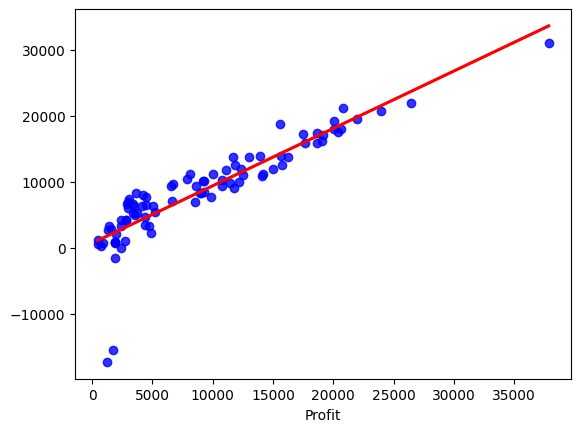

In [10]:
sns.regplot(x=y_test,y=y_pred,ci=None,scatter_kws={"color": "blue"}, line_kws={"color": "red"});

Now it's time for training.

In [ ]:
for epoch in range(num_epochs):
    train_running_loss = 0.0
    train_acc = 0.0

    model = model.train()

    ## training step
    for i, (images, labels) in enumerate(trainloader):

        images = images.to(device)
        labels = labels.to(device)

        ## forward + backprop + loss
        logits = model(images)
        loss = criterion(logits, labels)
        optimizer.zero_grad()
        loss.backward()

        ## update model params
        optimizer.step()

        train_running_loss += loss.detach().item()
        train_acc += get_accuracy(logits, labels, BATCH_SIZE)

    model.eval()
    print('Epoch: %d | Loss: %.4f | Train Accuracy: %.2f' \
          %(epoch, train_running_loss / i, train_acc/i))

Epoch: 0 | Loss: 1.4901 | Train Accuracy: 96.97
Epoch: 1 | Loss: 1.4808 | Train Accuracy: 97.90
Epoch: 2 | Loss: 1.4767 | Train Accuracy: 98.34
Epoch: 3 | Loss: 1.4748 | Train Accuracy: 98.55
Epoch: 4 | Loss: 1.4725 | Train Accuracy: 98.81


We can also compute accuracy on the testing dataset to see how well the model performs on the image classificaiton task. As you can see below, our basic CNN model is performing very well on the MNIST classification task.

In [ ]:
test_acc = 0.0
for i, (images, labels) in enumerate(testloader, 0):
    images = images.to(device)
    labels = labels.to(device)
    outputs = model(images)
    test_acc += get_accuracy(outputs, labels, BATCH_SIZE)

print('Test Accuracy: %.2f'%( test_acc/i))

Test Accuracy: 98.04


**EXERCISE:** As a way to practise, try to include the testing part inside the code where I was outputing the training accuracy, so that you can also keep testing the model on the testing data as you proceed with the training steps. This is useful as sometimes you don't want to wait until your model has completed training to actually test the model with the testing data.

## Final Words
That's it for this tutorial! Congratulations! You are now able to implement a basic CNN model in PyTorch for image classification. If you would like, you can further extend the CNN model by adding more convolution layers and max pooling, but as you saw, you don't really need it here as results look good. If you are interested in implementing a similar image classification model using RNNs see the references below.

## References
- [Building RNNs is Fun with PyTorch and Google Colab](https://colab.research.google.com/drive/1NVuWLZ0cuXPAtwV4Fs2KZ2MNla0dBUas)
- [CNN Basics with PyTorch by Sebastian Raschka](https://github.com/rasbt/deeplearning-models/blob/master/pytorch_ipynb/cnn/cnn-basic.ipynb)
- [Tensorflow 2.0 Quickstart for experts](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/advanced.ipynb#scrollTo=DUNzJc4jTj6G)